### 강의영상



- 본 강의노트로는 강의를 하지 않음.

---

### Imports

In [ ]:
# R에서는 별도의 import가 필요없음
# 필요시 library()를 사용

---

### 잘하는 추정이란?

![그림1: 솜씨좋은 사격사?](https://www.kdnuggets.com/wp-content/uploads/arya_biasvariance_tradeoff_5.png)

> ref: <https://www.kdnuggets.com/2022/08/biasvariance-tradeoff.html>

---

`# 예제1`

아래와 같은 데이터를 관찰하자. 

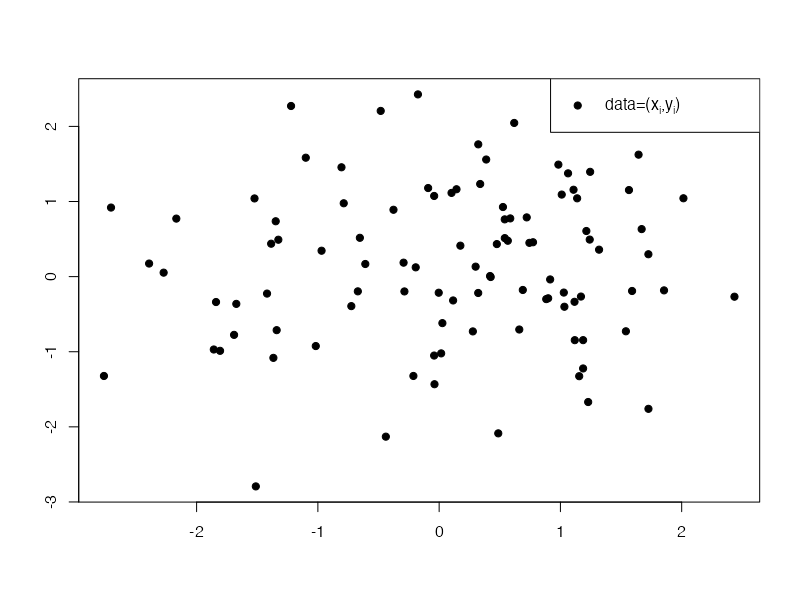

In [1]:
set.seed(43052)
x <- rnorm(100)
y <- rnorm(100)
plot(x, y, pch=19, xlab="", ylab="")
legend("topright", legend=expression(paste("data=(", x[i], ",", y[i], ")")), pch=19)

---

중심을 추정하는 문제를 고려하자. 

- A: 지금보니까 x,y의 평균은 모두 0 근처에 있는것 같지 않아? 굳이 극단적인 값을 고려할 필요는 없겠어. 그러니까 데이터중 상위 10%와 하위 10$를 잘라서 버린후 남은값들의 평균을 구하는건 어떄? 
- B: 머리아프게 굳이? 그냥 평균으로 추정하는건 어때?

누구의 말이 더 합리적일까? 

----

`-` 아이디어: A의 방식으로 추정한 1000결과를 가져오고, B의 방식으로 추정한 1000개의 결과를 가져와서 비교해보자. 

In [ ]:
A <- matrix(nrow=10000, ncol=2)
B <- matrix(nrow=10000, ncol=2)
for (i in 1:10000) {
    x <- rnorm(100)
    y <- rnorm(100)
    #---#
    x_sorted <- sort(x)
    y_sorted <- sort(y)
    A[i,] <- c(mean(x_sorted[11:90]), mean(y_sorted[11:90]))
    B[i,] <- c(mean(x), mean(y))
}

---

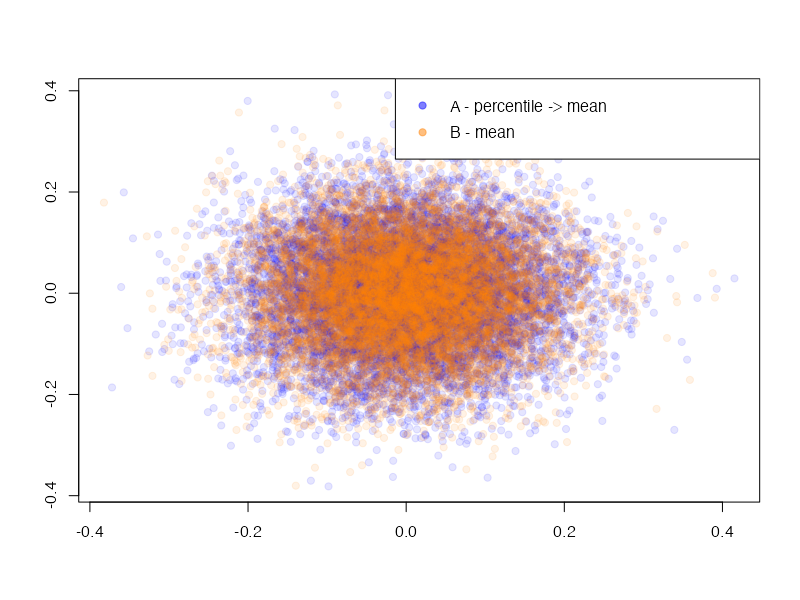

In [3]:
plot(A[,1], A[,2], pch=19, col=rgb(0,0,1,0.1), xlab="", ylab="",
     xlim=range(c(A[,1], B[,1])), ylim=range(c(A[,2], B[,2])))
points(B[,1], B[,2], pch=19, col=rgb(1,0.5,0,0.1))
legend("topright", legend=c("A - percentile -> mean", "B - mean"), 
       col=c(rgb(0,0,1,0.5), rgb(1,0.5,0,0.5)), pch=19)

`#`

---

`# 예제2`

다시 아래와 같은 데이터를 상상하자. 

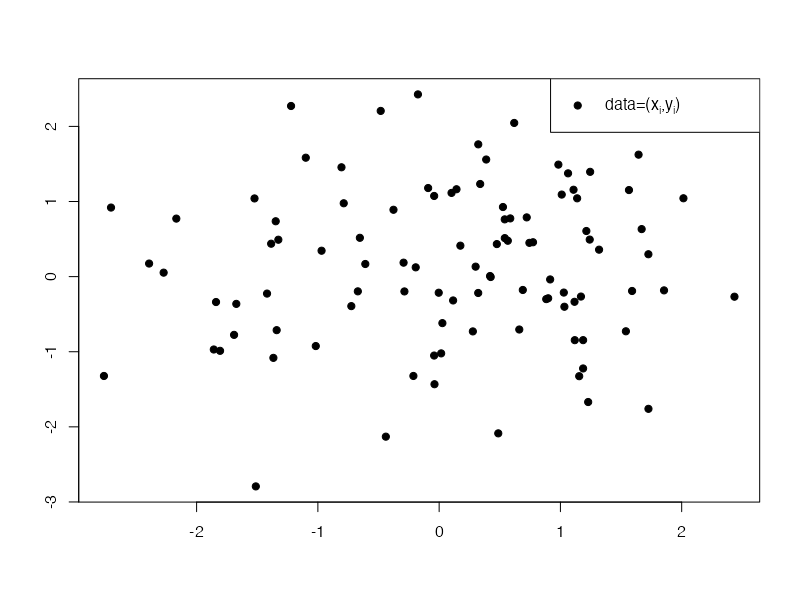

In [4]:
set.seed(43052)
x <- rnorm(100)
y <- rnorm(100)
plot(x, y, pch=19, xlab="", ylab="")
legend("topright", legend=expression(paste("data=(", x[i], ",", y[i], ")")), pch=19)

중심을 추정하는 문제를 고려하자. 

- A: 중앙값 한번 써보는게 어때?
- B: 그냥 평균으로 추정하는게 젤 좋다니까?

누구의 말이 더 합리적일까? 

---

In [ ]:
A <- matrix(nrow=10000, ncol=2)
B <- matrix(nrow=10000, ncol=2)
for (i in 1:10000) {
    x <- rnorm(100)
    y <- rnorm(100)
    #---#
    A[i,] <- c(median(x), median(y))
    B[i,] <- c(mean(x), mean(y))
}

plot(A[,1], A[,2], pch=19, col=rgb(0,0,1,0.1), xlab="", ylab="",
     xlim=range(c(A[,1], B[,1])), ylim=range(c(A[,2], B[,2])))
points(B[,1], B[,2], pch=19, col=rgb(1,0.5,0,0.1))
legend("topright", legend=c("A - median", "B - mean"), 
       col=c(rgb(0,0,1,0.5), rgb(1,0.5,0,0.5)), pch=19)

---

`# 예제3`

이제 아래와 같은 데이터를 상상하자. 

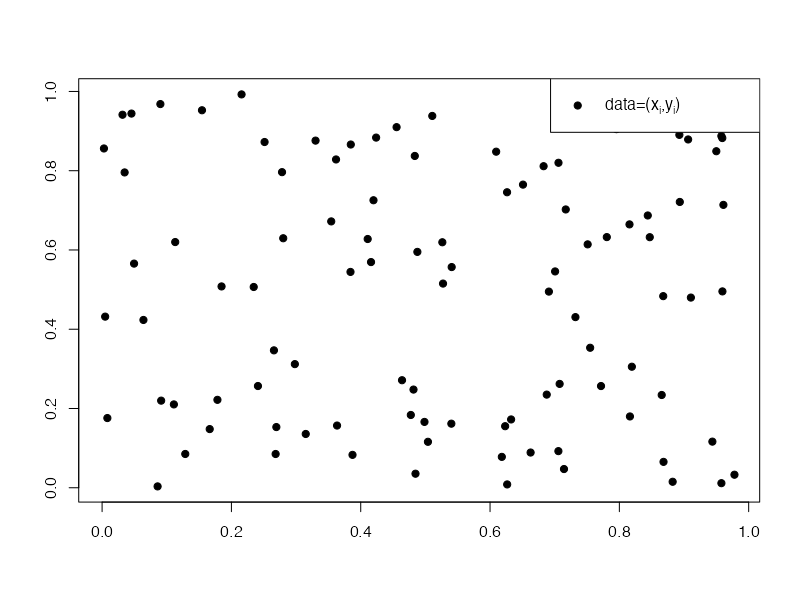

In [6]:
set.seed(43052)
x <- runif(100)
y <- runif(100)
plot(x, y, pch=19, xlab="", ylab="")
legend("topright", legend=expression(paste("data=(", x[i], ",", y[i], ")")), pch=19)

---

중심을 추정하는 문제를 고려하자. 

- A: 그냥 평균으로 추정하는게 젤 좋음. 그러니까 $(\bar{x},\bar{y})$로 추정하는게 제일 좋아. 
- B: 난 좀 특이하게 하고 싶어. $x$중에서 가장 작은 값과 큰값을 뽑고 평균을 구해. 그리고 $y$에서 가장 작은값과 큰 값을 뽑고 평균을 구할거야. 그러니까 나는 $$\left(\frac{\min(x)+\max(x)}{2}, \frac{\min(y)+\max(y)}{2}\right)$$ 로 추정하는게 좋을 것 같아. 

누구의 말이 더 합리적일까? 

---

In [ ]:
A <- matrix(nrow=10000, ncol=2)
B <- matrix(nrow=10000, ncol=2)
for (i in 1:10000) {
    x <- runif(100)
    y <- runif(100)
    #---#
    A[i,] <- c(mean(x), mean(y))
    B[i,] <- c((min(x)+max(x))/2, (min(y)+max(y))/2)
}

plot(A[,1], A[,2], pch=19, col=rgb(0,0,1,0.1), xlab="", ylab="",
     xlim=range(c(A[,1], B[,1])), ylim=range(c(A[,2], B[,2])))
points(B[,1], B[,2], pch=19, col=rgb(1,0.5,0,0.1))
legend("topright", 
       legend=c(expression(paste("A - (", bar(x), ",", bar(y), ")")),
                expression(paste("B - (", frac(min(x)+max(x), 2), ",", frac(min(y)+max(y), 2), ")"))),
       col=c(rgb(0,0,1,0.5), rgb(1,0.5,0,0.5)), pch=19)

---

`-` 놀라운점 

1. 차이가 왜이렇게 많이남? 
2. 주황색은 모양이 왜저래? 

`-` 피셔의주장

- 아무 생각 없이 (분포를 고려하지 않고) 무조건 직관적인 Method of Moments Estimation (MME) 방식으로 추정하는건 최선의 결과를 가져오지 못한다. 
- 만약 MME방식이 잘 동작했다면 그건 운이 좋아서 그렇다. *("적률법의 통계량들이 정규 곡선 근처에서 100% 효율로 수렴하는 이유는, 정규 곡선을 맞추는 데 있어 처음 두 적률이 **마침** 최적 통계량(optimum statistics)이기 때문이다", "정규 곡선 주변에서 적률법의 높은 효율성은 Pearson 곡선 형태를 지정하는 공식과 적률법이 최대 우도 해법을 제공하는 곡선 시스템(4차 지수 곡선)이 일치하기 때문에 발생한다")*